In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
nba = pd.read_csv('all_seasons.csv', index_col=0)

In [3]:
stats = list(nba.select_dtypes(include=[np.number]))
stats.append('player_name')
stats.append('season')

In [4]:
nba = nba[stats]

In [5]:
nba = nba[nba['gp'] >= 40]

In [6]:
x = nba[nba['season'] == '2018-19']
y = nba[nba['season'] == '2019-20']
z = nba[nba['season'] == '2020-21']
dfs = [x,y,z]

In [7]:
cleaned_nba = pd.concat(dfs)
cleaned_nba.describe().T

,count,mean,std,min,25%,50%,75%,max
age,993.0,26.562941,4.212395,19.00000,23.0000,26.00000,29.00000,43.00000
player_height,993.0,199.608701,8.439225,175.26000,193.0400,200.66000,205.74000,223.52000
player_weight,993.0,98.821389,11.026580,74.84268,90.7184,97.52228,106.59412,131.54168
gp,993.0,60.750252,10.981292,40.00000,52.0000,61.00000,69.00000,82.00000
pts,993.0,11.151964,6.154278,1.00000,6.6000,9.60000,14.50000,36.10000
reb,993.0,4.434038,2.447837,0.70000,2.7000,3.90000,5.50000,15.60000
ast,993.0,2.467674,1.921964,0.20000,1.1000,1.80000,3.30000,11.70000
net_rating,993.0,-0.254985,5.667150,-18.30000,-4.1000,-0.10000,3.60000,16.70000
oreb_pct,993.0,0.041660,0.032468,0.00300,0.0190,0.02900,0.05500,0.16200
dreb_pct,993.0,0.137896,0.053867,0.03900,0.0980,0.12800,0.16800,0.33600


In [8]:
def usage_rate_tiers(x):
    if x <= .14925:
        return('Low')
    if x <= .179:
        return('Medium')
    if x <= .22175:
        return('High')
    if x <= .396:
        return('Elite')
cleaned_nba['usg_pct'] = cleaned_nba['usg_pct'].apply(usage_rate_tiers)

<b>EDA on Variables</b>

In [9]:
cleaned_nba.columns

Index(['age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast',
       'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct',
       'player_name', 'season'],
      dtype='object')

In [10]:
sns.barplot(x='usg_pct',y='pts',data=cleaned_nba,order=['Low','Medium','High','Elite'])
cleaned_nba['pts'].groupby(cleaned_nba['usg_pct']).mean().sort_values()

usg_pct
Low        6.130196
Medium     8.455000
High      11.436437
Elite     19.426840
Name: pts, dtype: float64

In [11]:
sns.scatterplot(x='pts',y='usg_pct',data=nba)

,sum_sq,df,F,PR(>F)
Q('usg_pct'),24159.152023,3.0,593.787747,1.242735e-220
Residual,13412.986648,989.0,NaN,NaN


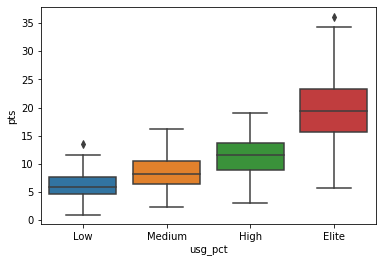

In [12]:
%matplotlib inline
sns.boxplot(x='usg_pct', y='pts',data=cleaned_nba,order=['Low','Medium','High','Elite'])
import statsmodels.api as sm
from statsmodels.formula.api import ols
age_lm = ols(" Q('pts') ~ Q('usg_pct')", data=cleaned_nba).fit()
table = sm.stats.anova_lm(age_lm, typ=2)
table

The p-value is less than .05 so points vary by usg_pct.

usg_pct
Low       3.775294
Medium    3.940769
High      4.448178
Elite     5.701299
Name: reb, dtype: float64

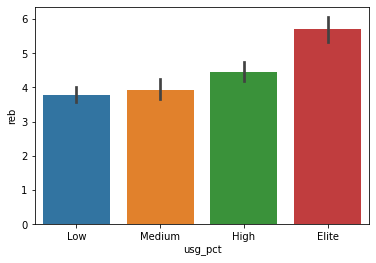

In [13]:
sns.barplot(x='usg_pct',y='reb',data=cleaned_nba,order=['Low','Medium','High','Elite'])
cleaned_nba['reb'].groupby(cleaned_nba['usg_pct']).mean().sort_values()

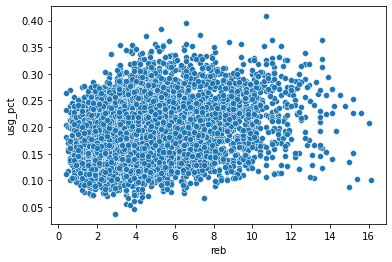

In [14]:
sns.scatterplot(x='reb',y='usg_pct',data=nba)

,sum_sq,df,F,PR(>F)
Q('usg_pct'),544.941017,3.0,33.274299,1.715896e-20
Residual,5399.028490,989.0,NaN,NaN


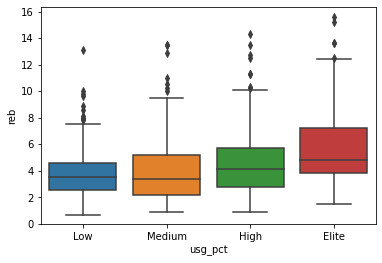

In [15]:
%matplotlib inline
sns.boxplot(x='usg_pct', y='reb',data=cleaned_nba,order=['Low','Medium','High','Elite'])
import statsmodels.api as sm
from statsmodels.formula.api import ols
age_lm = ols(" Q('reb') ~ Q('usg_pct')", data=cleaned_nba).fit()
table = sm.stats.anova_lm(age_lm, typ=2)
table

The p-value is less than .05 so rebounds vary by usg_pct.

usg_pct
Low       1.493725
Medium    1.880385
High      2.426316
Elite     4.248052
Name: ast, dtype: float64

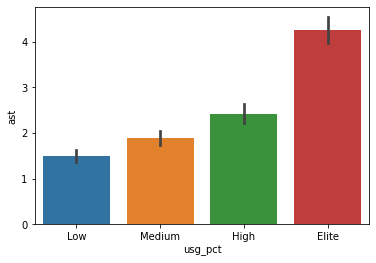

In [16]:
sns.barplot(x='usg_pct',y='ast',data=cleaned_nba,order=['Low','Medium','High','Elite'])
cleaned_nba['ast'].groupby(cleaned_nba['usg_pct']).mean().sort_values()

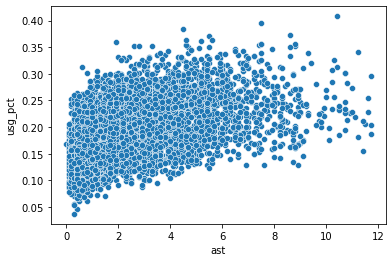

In [17]:
sns.scatterplot(x='ast',y='usg_pct',data=nba)

,sum_sq,df,F,PR(>F)
Q('usg_pct'),1064.196833,3.0,134.924556,2.844069e-73
Residual,2600.195493,989.0,NaN,NaN


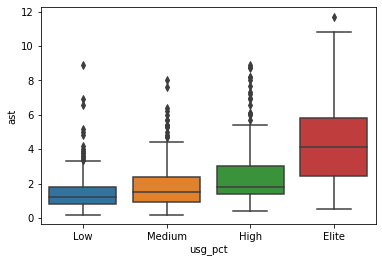

In [18]:
%matplotlib inline
sns.boxplot(x='usg_pct', y='ast',data=cleaned_nba,order=['Low','Medium','High','Elite'])
import statsmodels.api as sm
from statsmodels.formula.api import ols
age_lm = ols(" Q('ast') ~ Q('usg_pct')", data=cleaned_nba).fit()
table = sm.stats.anova_lm(age_lm, typ=2)
table

The p-value is less than .05 so assists vary by usg_pct.

,sum_sq,df,F,PR(>F)
Q('usg_pct'),66.798044,3.0,1.255799,0.288321
Residual,17535.518170,989.0,NaN,NaN


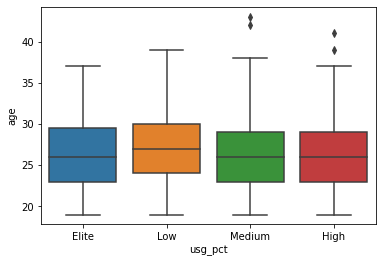

In [19]:
%matplotlib inline
sns.boxplot(x='usg_pct', y='age',data=cleaned_nba)
import statsmodels.api as sm
from statsmodels.formula.api import ols
age_lm = ols(" Q('age') ~ Q('usg_pct')", data=cleaned_nba).fit()
table = sm.stats.anova_lm(age_lm, typ=2)
table

The p-value is more than .05 so age does not vary by usg_pct.

,sum_sq,df,F,PR(>F)
Q('usg_pct'),867.141948,3.0,4.096489,0.006667
Residual,69783.608476,989.0,NaN,NaN


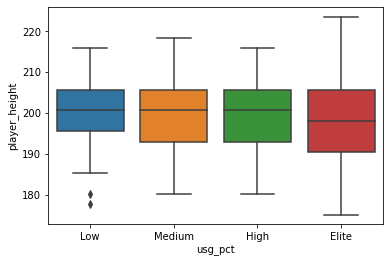

In [20]:
%matplotlib inline
sns.boxplot(x='usg_pct', y='player_height',data=cleaned_nba,order=['Low','Medium','High','Elite'])
import statsmodels.api as sm
from statsmodels.formula.api import ols
age_lm = ols(" Q('player_height') ~ Q('usg_pct')", data=cleaned_nba).fit()
table = sm.stats.anova_lm(age_lm, typ=2)
table

The p-value is more than .05 so player height does not vary by usg_pct.

,sum_sq,df,F,PR(>F)
Q('usg_pct'),790.54762,3.0,2.175032,0.089389
Residual,119822.24259,989.0,NaN,NaN


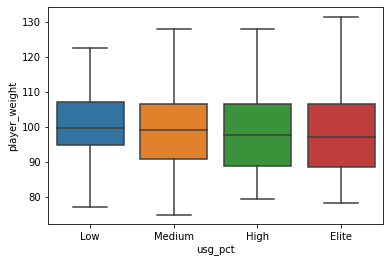

In [21]:
%matplotlib inline
sns.boxplot(x='usg_pct', y='player_weight',data=cleaned_nba,order=['Low','Medium','High','Elite'])
import statsmodels.api as sm
from statsmodels.formula.api import ols
age_lm = ols(" Q('player_weight') ~ Q('usg_pct')", data=cleaned_nba).fit()
table = sm.stats.anova_lm(age_lm, typ=2)
table

The p-value is more than .05 so player weight does not vary by usg_pct.

,sum_sq,df,F,PR(>F)
Q('usg_pct'),590.716099,3.0,1.636007,0.179393
Residual,119033.346338,989.0,NaN,NaN


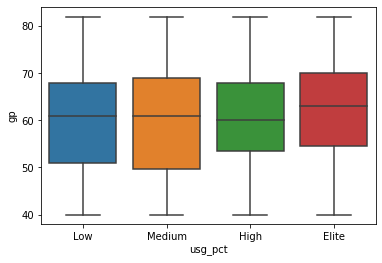

In [22]:
%matplotlib inline
sns.boxplot(x='usg_pct', y='gp',data=cleaned_nba,order=['Low','Medium','High','Elite'])
import statsmodels.api as sm
from statsmodels.formula.api import ols
age_lm = ols(" Q('gp') ~ Q('usg_pct')", data=cleaned_nba).fit()
table = sm.stats.anova_lm(age_lm, typ=2)
table

The p-value is above .05, so games played does not vary by usg_pct.

,sum_sq,df,F,PR(>F)
Q('usg_pct'),817.532881,3.0,8.682181,0.000011
Residual,31042.124944,989.0,NaN,NaN


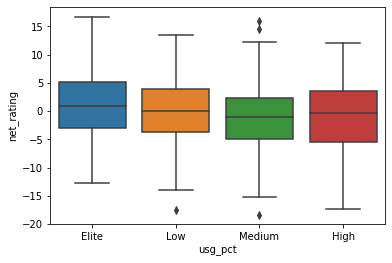

In [23]:
sns.boxplot(x='usg_pct', y='net_rating',data=cleaned_nba)
net_lm = ols(" Q('net_rating') ~ Q('usg_pct')", data=cleaned_nba).fit()
table = sm.stats.anova_lm(net_lm, typ=2)
table

The p-value is less than .05 so net_rating varies by usg_pct.

,sum_sq,df,F,PR(>F)
Q('usg_pct'),0.016723,3.0,5.357608,0.00116
Residual,1.029026,989.0,NaN,NaN


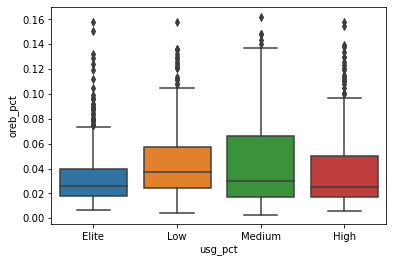

In [24]:
sns.boxplot(x='usg_pct',y='oreb_pct',data=cleaned_nba)
oreb_lm = ols(" Q('oreb_pct') ~ Q('usg_pct')", data=cleaned_nba).fit()
table = sm.stats.anova_lm(oreb_lm, typ=2)
table

The p-value is less than .05, so oreb_pct does vary by usg_pct.

,sum_sq,df,F,PR(>F)
Q('usg_pct'),0.015486,3.0,1.783246,0.148655
Residual,2.862936,989.0,NaN,NaN


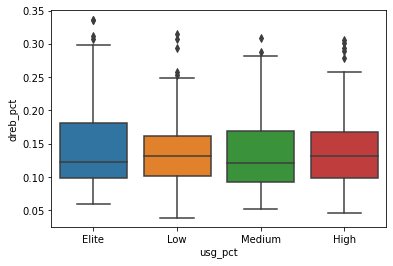

In [25]:
sns.boxplot(x='usg_pct',y='dreb_pct',data=cleaned_nba)
dreb_lm = ols(" Q('dreb_pct') ~ Q('usg_pct')", data=cleaned_nba).fit()
table = sm.stats.anova_lm(dreb_lm, typ=2)
table

The p-value is bigger than .05, so dreb_pct does not vary by usg_pct.

,sum_sq,df,F,PR(>F)
Q('usg_pct'),0.028890,3.0,3.881136,0.008964
Residual,2.453914,989.0,NaN,NaN


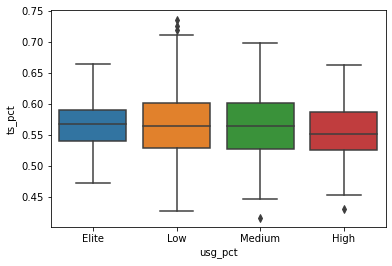

In [26]:
sns.boxplot(x='usg_pct',y='ts_pct',data=cleaned_nba)
ts_lm = ols(" Q('ts_pct') ~ Q('usg_pct')", data=cleaned_nba).fit()
table = sm.stats.anova_lm(ts_lm, typ=2)
table

The p-value is less than .05, so ts_pct does vary by usg_pct.

,sum_sq,df,F,PR(>F)
Q('usg_pct'),1.823840,3.0,108.73574,7.592450e-61
Residual,5.529546,989.0,NaN,NaN


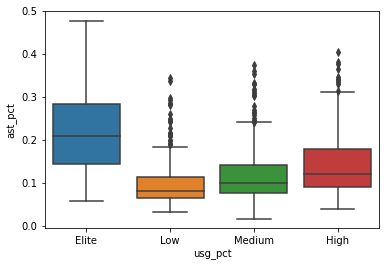

In [27]:
sns.boxplot(x='usg_pct',y='ast_pct',data=cleaned_nba)
ast_lm = ols(" Q('ast_pct') ~ Q('usg_pct')", data=cleaned_nba).fit()
table = sm.stats.anova_lm(ast_lm, typ=2)
table

The p-value is approximately 0, so act_pct does vary by usg_pct.

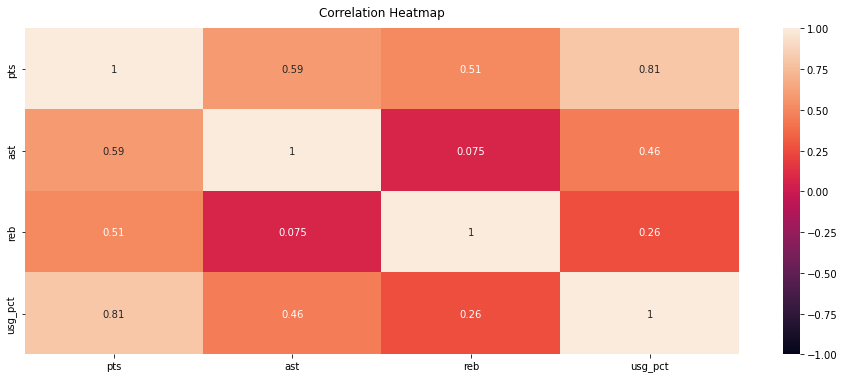

In [28]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(nba[['pts','ast','reb','usg_pct']].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<b>Create training dataset</b>

In [29]:
eighteen = cleaned_nba[cleaned_nba['season'] == '2018-19']
nineteen = cleaned_nba[cleaned_nba['season'] == '2019-20']
twenty = cleaned_nba[cleaned_nba['season'] == '2020-21']

In [30]:
nineteen_names = nineteen['player_name']
nineteen_names = list(nineteen_names)
eighteen = eighteen[eighteen['player_name'].isin(nineteen_names)]
eighteen_names = eighteen['player_name']
eighteen_names = list(eighteen_names)
nineteen = nineteen[nineteen['player_name'].isin(nineteen_names)]
nineteen_usg_rates = nineteen[['player_name','usg_pct']]
data = pd.merge(eighteen, nineteen_usg_rates, on='player_name')
data = data.rename(columns={"usg_pct_x": "current_usg_pct", "usg_pct_y": "next_usg_pct"})
data = data.drop(['season'], axis = 1)

In [31]:
twenty_names = twenty['player_name']
twenty_names = list(twenty_names)
nineteen = nineteen[nineteen['player_name'].isin(twenty_names)]
nineteen_names = nineteen['player_name']
nineteen_names = list(nineteen_names)
twenty = twenty[twenty['player_name'].isin(twenty_names)]
twenty_usg_rates = twenty[['player_name','usg_pct']]
data1 = pd.merge(nineteen, twenty_usg_rates, on='player_name')
data1 = data1.rename(columns={"usg_pct_x": "current_usg_pct", "usg_pct_y": "next_usg_pct"})
data1 = data1.drop(['season'], axis = 1)

In [32]:
from scipy.stats import chi2_contingency
ct = pd.crosstab(data.current_usg_pct,data.next_usg_pct)
chi2, p, dof, ex = chi2_contingency(ct)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)

chi2 =  191.8517807082684
p-val =  1.6866092954668432e-36
degree of freedom =  9


In [41]:
ct

next_usg_pct,Elite,High,Low,Medium
current_usg_pct,,,,
Elite,48,11,1,0
High,13,25,6,15
Low,0,5,37,18
Medium,1,19,18,29


<b>Machine Learning</b>

In [33]:
from sklearn.model_selection import train_test_split
ml_data = data.copy()
ml_data = ml_data.drop(['player_name'], axis = 1)
ml_data = ml_data.drop(['player_height', 'player_weight', 'age', 'gp', 'dreb_pct', 'ast_pct', 'reb'], axis = 1)

target = "next_usg_pct"

X = ml_data.drop(target, axis=1)
y = ml_data[target]

seed = 5
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [34]:
X_train

,pts,ast,net_rating,oreb_pct,current_usg_pct,ts_pct
184,25.6,5.5,-1.8,0.028,Elite,0.581
185,10.6,1.5,0.9,0.081,Medium,0.682
84,10.3,1.8,-11.7,0.075,High,0.541
180,11.8,2.1,-0.3,0.008,Medium,0.586
87,5.0,1.1,1.7,0.027,Low,0.531
...,...,...,...,...,...,...
230,14.8,3.9,-10.8,0.019,Elite,0.531
189,13.6,1.0,5.4,0.032,Medium,0.592
239,9.4,0.8,-5.8,0.071,High,0.587
206,7.2,1.2,-0.9,0.025,Low,0.561


In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(X_train.select_dtypes(include=[np.number]))
cat_attribs = list(X_train.select_dtypes(exclude=[np.number]))

pipeline = full_pipeline = ColumnTransformer([
        ("cat", OneHotEncoder(), cat_attribs), 
        ("num", StandardScaler(), num_attribs)
    ])

X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = [GaussianNB(), 
          LogisticRegression(), 
          svm.SVC(), 
          DecisionTreeClassifier(
          random_state=seed), 
          RandomForestClassifier(
          random_state=seed)]
for model in models:
    model.fit(X_train_prepared, y_train)
    y_pred = model.predict(X_test_prepared)
    accuracy = accuracy_score(y_test, y_pred)
    print('model name:', model, "Accuracy: %.2f%%" % (accuracy * 100.0))

model name: GaussianNB() Accuracy: 46.00%
model name: LogisticRegression() Accuracy: 64.00%
model name: SVC() Accuracy: 56.00%
model name: DecisionTreeClassifier(random_state=5) Accuracy: 52.00%
model name: RandomForestClassifier(random_state=5) Accuracy: 44.00%


In [37]:
from sklearn.ensemble import VotingClassifier
clf1 = svm.SVC(C=10, gamma=0.01)
clf2 = LogisticRegression()
eclf1 = VotingClassifier(estimators=[
        ('svc', clf1), ('lr', clf2)], voting='hard')
eclf1 = eclf1.fit(X_train_prepared, y_train)
y_pred = eclf1.predict(X_test_prepared)
accuracy = accuracy_score(y_test, y_pred)
print('model name:', clf1, 'and', clf2, "Accuracy: %.2f%%" % (accuracy * 100.0))

model name: SVC(C=10, gamma=0.01) and LogisticRegression() Accuracy: 66.00%


In [38]:
predict_data = data1.copy()
predict_data = predict_data.drop(['player_name'], axis = 1)
predict_data = predict_data.drop(['player_height', 'player_weight', 'age', 'gp', 'dreb_pct', 'ast_pct', 'reb'], axis = 1)

target = "next_usg_pct"

X = predict_data.drop(target, axis=1)
y = predict_data[target]
X_predict = full_pipeline.transform(X)
y_pred = eclf1.predict(X_predict)
accuracy = accuracy_score(y, y_pred)
output = pd.DataFrame({'Actual' : y, 'Predicted': y_pred, 'Player': data1.player_name})
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 56.03%


In [39]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y, y_pred))
print(confusion_matrix(y, y_pred))

              precision    recall  f1-score   support

       Elite       0.77      0.78      0.77        68
        High       0.35      0.30      0.32        57
         Low       0.66      0.75      0.70        52
      Medium       0.38      0.38      0.38        55

    accuracy                           0.56       232
   macro avg       0.54      0.55      0.54       232
weighted avg       0.55      0.56      0.55       232

[[53 10  1  4]
 [15 17  4 21]
 [ 0  4 39  9]
 [ 1 18 15 21]]


In [40]:
output.head()

,Actual,Predicted,Player
0,Elite,Elite,Fred VanVleet
1,High,Medium,Furkan Korkmaz
2,Low,Medium,Garrett Temple
3,High,Medium,Gary Trent Jr.
4,Medium,Medium,Georges Niang


In [43]:
data1

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,current_usg_pct,ts_pct,ast_pct,player_name,next_usg_pct
0,26.0,185.42,89.357624,54,17.6,3.8,6.6,4.8,0.009,0.088,High,0.553,0.281,Fred VanVleet,Elite
1,22.0,200.66,91.625584,72,9.8,2.3,1.1,2.7,0.011,0.093,Medium,0.579,0.073,Furkan Korkmaz,High
2,34.0,195.58,88.450440,62,10.3,3.5,2.5,-1.4,0.015,0.096,Medium,0.513,0.132,Garrett Temple,Low
3,21.0,195.58,94.800728,61,8.9,1.6,1.0,-1.4,0.017,0.052,Medium,0.587,0.064,Gary Trent Jr.,High
4,27.0,200.66,104.326160,66,5.9,1.9,0.7,-1.1,0.015,0.117,Medium,0.589,0.069,Georges Niang,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,30.0,203.20,98.883056,62,16.7,5.0,1.4,1.5,0.029,0.128,High,0.570,0.066,Marcus Morris Sr.,High
228,23.0,195.58,91.171992,65,4.7,1.6,1.2,2.4,0.033,0.049,Low,0.539,0.081,Matisse Thybulle,Low
229,25.0,193.04,86.182480,41,4.9,1.5,0.5,4.2,0.018,0.100,Medium,0.650,0.076,Matt Thomas,High
230,30.0,203.20,111.130040,58,9.7,3.8,1.3,-5.8,0.033,0.144,High,0.565,0.100,Markieff Morris,Medium
